## LSPR: Pygbe vs analytical (experimental data)

We run pygbe and the analytical solution for the Cext calculation for the cases we have experimental data. We compare the error between these runs and analyze the results. 

We run both silver and gold, using the data from [Johnson and Christy, 1972](https://journals.aps.org/prb/pdf/10.1103/PhysRevB.6.4370). We run meshes from 2K elements of a nanoparticle of radius 10nm.

The water data we have is from [Hale and Querry, 1972](https://www.osapublishing.org/ao/abstract.cfm?uri=ao-12-3-555) but none of the wavelengths match to the ones we have for the metals. Therefore, we  interpolate the water data linearly (choice explained in water_data_analysis.ipynb) and we use the obtained function and evaluate it on the metal wavelengths that fit in the range of interpolation to get the corresponding refractive indices.  

In [1]:
import numpy
from matplotlib import pyplot
#%matplotlib notebook
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

### Load silver data

In [2]:
lambda_s, Cext_s, Cext_an_s, error_s = numpy.loadtxt('data/lambda_Cext_Cext_an_error_silver.txt', unpack=True)

### Load gold data

In [3]:
lambda_g, Cext_g, Cext_an_g, error_g = numpy.loadtxt('data/lambda_Cext_Cext_an_error_gold.txt', unpack=True)

## Plot data

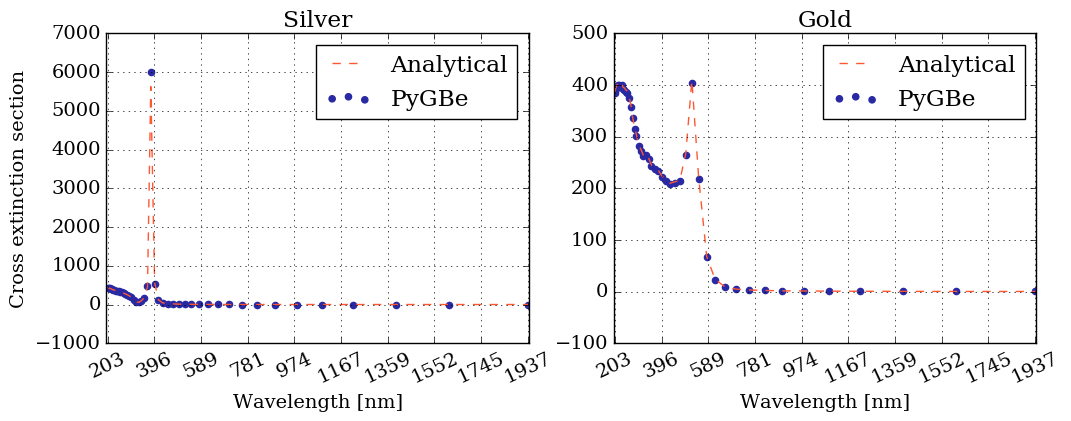

In [4]:
#Plot data 
pyplot.figure(figsize=(12,4))  

pyplot.subplot(121)

pyplot.scatter(lambda_s, Cext_s, color='#2929a3', label='PyGBe')
pyplot.plot(lambda_s, Cext_an_s, color='#ff5733', ls='--', label='Analytical') 


pyplot.xlabel('Wavelength [nm]')
pyplot.ylabel('Cross extinction section')
pyplot.xlim(min(lambda_s)-5, max(lambda_s)+5)
pyplot.xticks(numpy.linspace(min(lambda_s), max(lambda_s), 10), rotation=25)
pyplot.title('Silver')
pyplot.legend(loc='best')
pyplot.grid()


pyplot.subplot(122)

pyplot.scatter(lambda_g, Cext_g, color='#2929a3', label='PyGBe')
pyplot.plot(lambda_g, Cext_an_g, color='#ff5733', ls='--', label='Analytical') 


pyplot.xlabel('Wavelength [nm]')
#pyplot.ylabel('Cross extinction section')
pyplot.xlim(min(lambda_g)-5, max(lambda_g)+5)
pyplot.xticks(numpy.linspace(min(lambda_g), max(lambda_g), 10), rotation=25)
pyplot.title('Gold')
pyplot.legend(loc='best')
pyplot.grid()

## Plot error - 2K

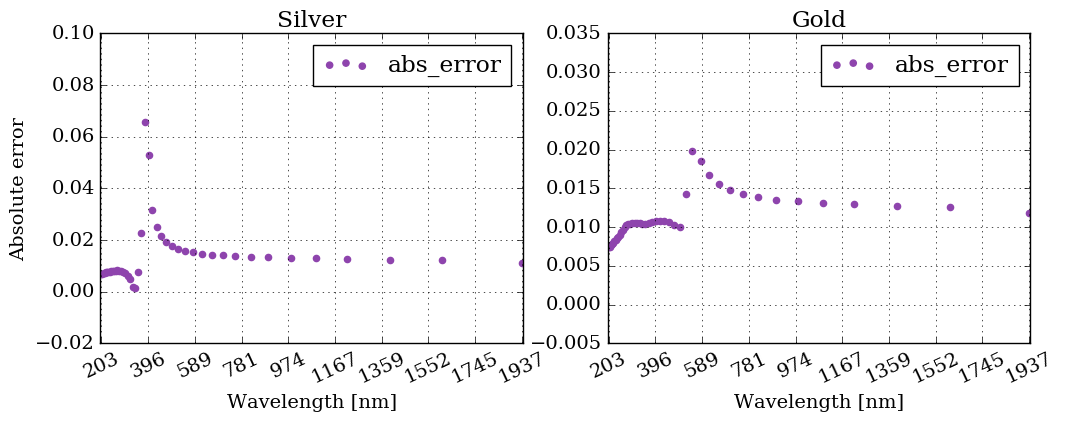

In [5]:
#Plot error 2k
pyplot.figure(figsize=(12,4))  

pyplot.subplot(121)

pyplot.scatter(lambda_s, error_s, color='#8e44ad', label='abs_error')


pyplot.xlabel('Wavelength [nm]')
pyplot.ylabel('Absolute error')
pyplot.xlim(min(lambda_s)-5, max(lambda_s)+5)
pyplot.xticks(numpy.linspace(min(lambda_s), max(lambda_s), 10), rotation=25)
pyplot.title('Silver')
pyplot.legend(loc='best')
pyplot.grid()


pyplot.subplot(122)

pyplot.scatter(lambda_g, error_g, color='#8e44ad', label='abs_error')


pyplot.xlabel('Wavelength [nm]')
#pyplot.ylabel('Cross extinction section')
pyplot.xlim(min(lambda_g)-5, max(lambda_g)+5)
pyplot.xticks(numpy.linspace(min(lambda_g), max(lambda_g), 10), rotation=25)
pyplot.title('Gold')
pyplot.legend(loc='best')
pyplot.grid()

## Let's run for 8K meshes

### Load silver data 8K

In [6]:
lambda_s_8k, Cext_s_8k, Cext_an_s_8k, error_s_8k = numpy.loadtxt('data/lambda_Cext_Cext_an_error_silver_8K.txt', unpack=True)

### Load golda data

In [7]:
lambda_g_8k, Cext_g_8k, Cext_an_g_8k, error_g_8k = numpy.loadtxt('data/lambda_Cext_Cext_an_error_gold_8K.txt', unpack=True)

## Plot error

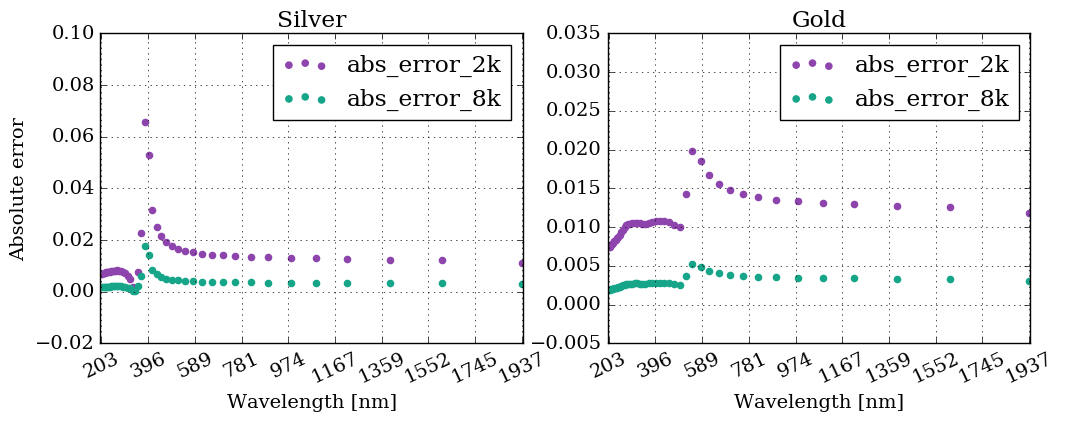

In [8]:
#Plot error 2k vs 8k
pyplot.figure(figsize=(12,4))  

pyplot.subplot(121)

pyplot.scatter(lambda_s, error_s, color='#8e44ad', label='abs_error_2k')
pyplot.scatter(lambda_s_8k, error_s_8k, color='#17a589', label='abs_error_8k')


pyplot.xlabel('Wavelength [nm]')
pyplot.ylabel('Absolute error')
pyplot.xlim(min(lambda_s)-5, max(lambda_s)+5)
pyplot.xticks(numpy.linspace(min(lambda_s), max(lambda_s), 10), rotation=25)
pyplot.title('Silver')
pyplot.legend(loc='best')
pyplot.grid()


pyplot.subplot(122)

pyplot.scatter(lambda_g, error_g, color='#8e44ad', label='abs_error_2k')
pyplot.scatter(lambda_g_8k, error_g_8k, color='#17a589', label='abs_error_8k')


pyplot.xlabel('Wavelength [nm]')
#pyplot.ylabel('Cross extinction section')
pyplot.xlim(min(lambda_g)-5, max(lambda_g)+5)
pyplot.xticks(numpy.linspace(min(lambda_g), max(lambda_g), 10), rotation=25)
pyplot.title('Gold')
pyplot.legend(loc='best')
pyplot.grid()

## Error analysis

Considering that the experimental error for the real part (biggest error) of the refractive index is $+/-0.02$, if we are using gold, the mesh of 2K elements is enough since the biggest erro we get is around $0.02$. However, in the silver case, there is a zone where the error goes up to $~0.07$, in this zone the 2k mesh might not be appropriate. Refining the mesh to 8K elements in the case of silver leads us to errors not bigger than $0.02$ therefore we considere that the 8K mesh is better in this case. 

Note, we we are not working in wavelengths were the error is $>0.02$ in the 2K plot, we consider that the use of a mesh of 2K elements is good enough to represent the behaviour. Besides, is less computationally expensive.